# Bellabeat Capstone

### Introduction ###

I have been asked to do data analysis on a competitor to see how our products can be changed to increase our market in the smart wearables sector.

# ASK #

## Overall Questions ##
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


## Guiding Questions ##
1. What is the problem you are trying to solve?
2. How can your insights drive business decisions?



##  Guiding Questions Answers ##

    1. We have FitBit data, and we are going to do an analysis on this data to figure out how a Bellabeat competitor users use their devices, to see possibilities of how we might gain market share.

    2. Given the proper insights, we could develop new products or other uses for exisiting products.

# Prepare #



Guiding questions

● Where is your data stored? 

    The data can be found at the Kaggle repo [here.](https://www.kaggle.com/datasets/arashnic/fitbit)
    
● How is the data organized? Is it in long or wide format?

    The data is in a long format, as each row is an observation where the columns are the oberservation's parameters
    
● Are there issues with bias or credibility in this data? Does your data ROCCC?

    Reliable: No, since there are only 33 unique users.
    Original: Yes, seems original and unique data.
    Comprehensive: No, since there are only 33 unique users.
    Current: No, this data is from 2016.
    Cited: No, the data is not cited.
    
● How are you addressing licensing, privacy, security, and accessibility?

    This data is publicly available, no personal information is avaialbe.
    
● How did you verify the data’s integrity?

    
    
● How does it help you answer your question?



● Are there any problems with the data?

    This data doesn't ROCCC, if this was a larger study with more user data and more recent, it would do a lot to make it better


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
#import data using pd.read_csv

df = pd.read_csv('dailyActivity_merged.csv')

In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Process #

## Guiding questions ##

● What tools are you choosing and why?

● Have you ensured your data’s integrity?

● What steps have you taken to ensure that your data is clean?

● How can you verify that your data is clean and ready to analyze?

● Have you documented your cleaning process so you can review and share those results?

In [4]:
# Find unique entries in possible columns that might be dropped

print('Unique Id: ', df['Id'].nunique())
print('Unique ActivityDate: ', df['ActivityDate'].nunique())
print('Unique LoggedActivitiesDistance: ', df['LoggedActivitiesDistance'].nunique())
print('Unique SedentaryActiveDistance: ', df['SedentaryActiveDistance'].nunique())

Unique Id:  33
Unique ActivityDate:  31
Unique LoggedActivitiesDistance:  19
Unique SedentaryActiveDistance:  9


    So we can comfortably get rid of LoggedActivitiesDistance and SedentaryActiveDistance, as there is not a lot of unique information to consider keeping.

In [5]:
# Find if there are any missing values

df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
# Drop the columns: LoggedActivitiesDistance, SedentaryActiveDistance

df.drop(['LoggedActivitiesDistance','SedentaryActiveDistance'], inplace=True, axis=1)

df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863


In [8]:
# Creating a new column named Weekday to show the day of the week.
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')

df['Weekday'] = df['ActivityDate'].dt.day_name()

In [9]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Weekday
0,1503960366,2016-04-12,13162,8.50,8.50,1.88,0.55,6.06,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,1.57,0.69,4.71,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,2.44,0.40,3.91,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,2.14,1.26,2.83,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,2.71,0.41,5.04,36,10,221,773,1863,Saturday


## Process Questions Answers ##

Guiding questions

● What tools are you choosing and why?

    I have chosen to use Python, its ease of use for creating visualizations will be useful.
    
● Have you ensured your data’s integrity?

    Yes, above I have ensured that there were no null values in the data.
    
● What steps have you taken to ensure that your data is clean?
    
    I have checked for unique entries, dropped unnecessary columns, null values, and data types.
    
● How can you verify that your data is clean and ready to analyze?
    
    The data is clean, and ready to analyze, because of the steps above to ensure clean data.
    
● Have you documented your cleaning process so you can review and share those results?

    Yes, in the comments of the cells above.

# Analyze #

In [10]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,1.502681,0.567543,3.340819,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,2.658941,0.883580,2.040655,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.210000,0.240000,3.365000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,2.052500,0.800000,4.782500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,21.920000,6.480000,10.710000,210.000000,143.000000,518.000000,1440.000000,4900.000000


Guiding questions

● How should you organize your data to perform analysis on it?
    
    The data is organized in a dataframe.
    
● Has your data been properly formatted?

    The data is sorted by Id then ActivityDate.
    
● What surprises did you discover in the data?
    
    The average number of steps is just over 7600.
    The average VeryActiveDistance is 1.5, I am assuming miles, the data is not clear on the unit measured.
    A point to note the average SedentaryMinutes is 991 minutes which is over 16.5 hours.
    
    
● What trends or relationships did you find in the data?
    
    If you add all the average Minutes columns, it total average wear time of the fitbit is 20.3 hours.
    
● How will these insights help answer your business questions?
    
    We could indicate that users wear these devices for an average of 20.3 hours a day, which means some people sleep in them. Therefore, we might want to make a waterproof, or sleeping appropriate smart devices.

# Share #

In [11]:
# makeing the Weekday column go Monday - Sunday

day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['Weekday'] = pd.Categorical(df['Weekday'], categories=day_order, ordered=True)

df_weekday = df.sort_values(by = ['Weekday'])


In [12]:
df_weekday['Weekday'].value_counts()

Tuesday      152
Wednesday    150
Thursday     147
Friday       126
Saturday     124
Sunday       121
Monday       120
Name: Weekday, dtype: int64

(array([120., 152., 150., 147., 126., 124., 121.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

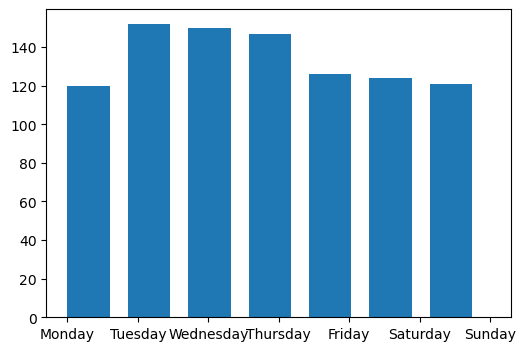

In [13]:
# Plot showing the value_counts above. We see that there was more usage on 
#    Tuesday, Wednesday, Thursday than other days
plt.figure(figsize=(6, 4))

plt.hist(df_weekday.Weekday, bins =7, align = 'mid', width = .6)

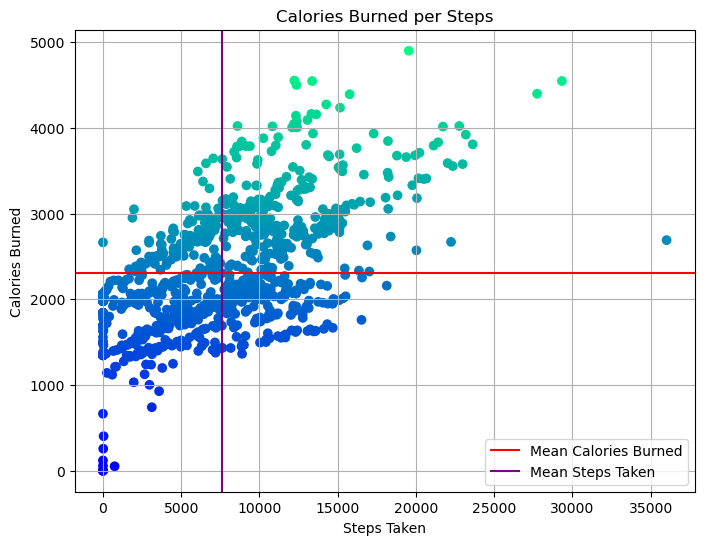

In [14]:
avg_cal = df['Calories'].mean()
avg_steps = df['TotalSteps'].mean()

plt.figure(figsize=(8,6))

plt.scatter(df.TotalSteps, df.Calories, c=df.Calories, cmap = 'winter')
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned per Steps")
plt.axhline(avg_cal, color = 'Red', label='Mean Calories Burned')
plt.axvline(avg_steps, color = 'Purple', label='Mean Steps Taken')
plt.legend()
plt.grid(True)
plt.show()

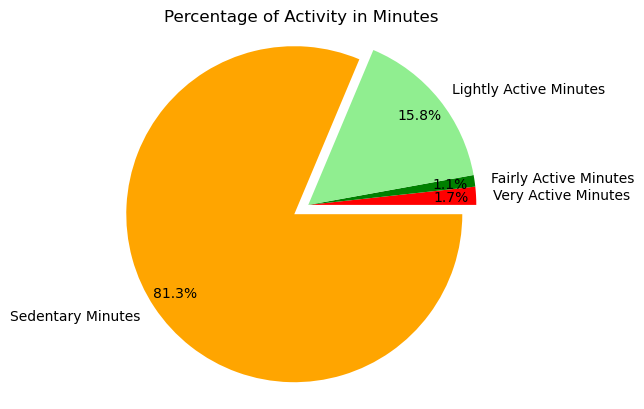

In [15]:
# Pie Plot to see the Minute Column breakdown

very_active = df['VeryActiveMinutes'].sum()
fair_active = df['FairlyActiveMinutes'].sum()
light_active = df['LightlyActiveMinutes'].sum()
still_active = df['SedentaryMinutes'].sum()

slices = [very_active, fair_active, light_active, still_active]
labels = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Sedentary Minutes']
colors = ['red', 'green', 'lightgreen', 'orange']
explode = [0, 0, 0, .1]

plt.pie(slices, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', pctdistance=.85, labeldistance=1.1)
plt.title("Percentage of Activity in Minutes")
plt.axis('equal')
plt.show()

### What the Pie Plot Shows ###

1. Sedentary Minutes is the largest slice, therefore, users are not wearing the devices to just workout.
2. This could indicate that users are just wearing the device all day long.

## Guiding questions ##


● What story does your data tell?

    We found that most people are just wearing their devices around.

● How do your findings relate to your original question?

    The original questions are: 
    What are some trends in smart device usage?
        We notice that most users are not using their devices for workouts alone.
    How could these trends apply to Bellabeat customers?
        If we go for something more aesthetically pleasing, users might still buy our devices.
    How could these trends help influence Bellabeat marketing strategy?
        Go for pretty things, so maybe jewelry.


● Who is your audience? What is the best way to communicate with them?

    Our audience is the CEO, and the marketing team. They should have similar presentations, certainly we want to have the visualizations in there.

● Can data visualization help you share your findings?

    Absolutely, the pie chart really helps give a big picture overview of the data.